[1.00879852 1.99658398]
0.01534441947372157


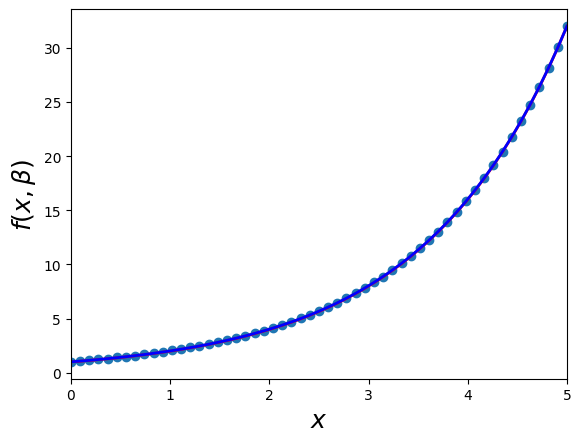

In [41]:
# Задание 1

import matplotlib.pyplot as plt
import scipy as sp
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import numpy as np
from  scipy.optimize import curve_fit


beta = (1,2)

def f(x, a, b):
    return a * b**x

x_data = np.linspace(0, 5, 55)

y = f(x_data, *beta)

y_data = y + 0.05 * np.random.rand(len(x_data))

beta_opt, beta_cov = sp.optimize.curve_fit(f,x_data,y_data)

lin_dev = sum(beta_cov[0])
print(beta_opt)

residuals = y_data -f(x_data, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig,ax = plt.subplots()
ax.scatter(x_data,y_data)

ax.plot(x_data,y,'r',lw =2 )
ax.plot(x_data,f(x_data,*beta_opt),'b',lw = 2)

ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0
(30, 2)
       YearsExperience         Salary
count        30.000000  

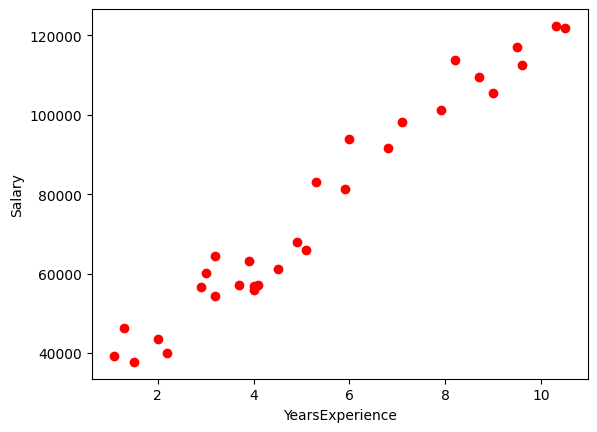

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
LinearRegression()
25825.984232150113
[9133.88237036]


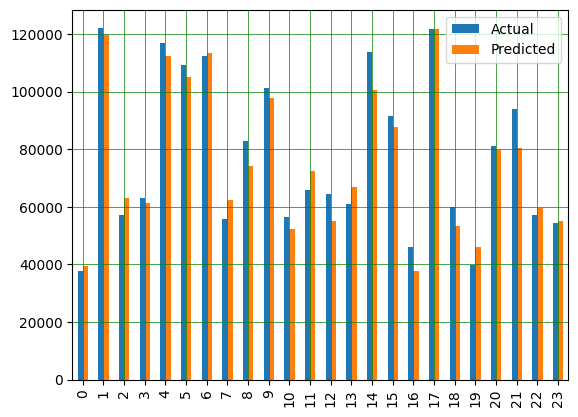

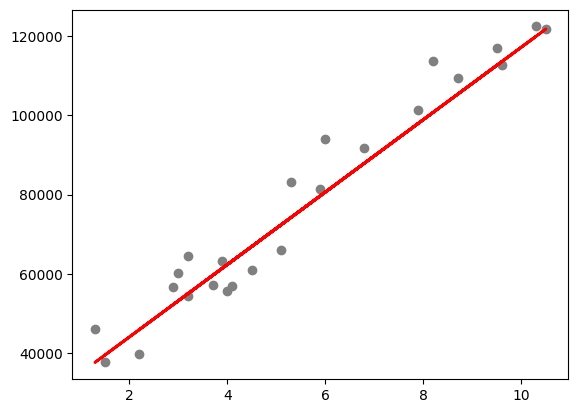

In [42]:
# Задание 2

import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"

df = pd.read_csv(url)


print(df)
print(df.shape)
print(df.describe())

plt.scatter(df['YearsExperience'],df["Salary"],color = 'r',label = "Salary data ")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

X =df.iloc[:,:-1].values
y = df.iloc[:,1].values

print(X)
print(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)

regressor = LinearRegression()
print(regressor)

regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred =regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test,"Predicted": y_pred})


df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

plt.scatter(X_test,y_test,color = 'gray')
plt.plot(X_test,y_pred,color = 'red', linewidth= 2)
plt.show()

In [46]:
# Задание 3

from sklearn import metrics

url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

data1 = pd.read_csv(url1)
data2 = pd.read_csv(url2)

X_train1, X_test1, y_train1, y_test1 = train_test_split(data1.iloc[:, :-1], data1.iloc[:, -1], test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2.iloc[:, :-1], data2.iloc[:, -1], test_size=0.2, random_state=0)

regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)
regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

y_pred1 = regressor1.predict(X_test1)
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)
y_pred2 = regressor2.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
display(df2)

print(metrics.mean_squared_error(y_test1, y_pred1))
print(metrics.mean_squared_error(y_test2, y_pred2))

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


4666.344787588369
0.3844711978201248


[[2.  1. ]
 [2.2 1. ]
 [2.4 1. ]
 [2.6 1. ]
 [2.8 1. ]
 [3.  1. ]]
-0.4285714285714306 4.238095238095244


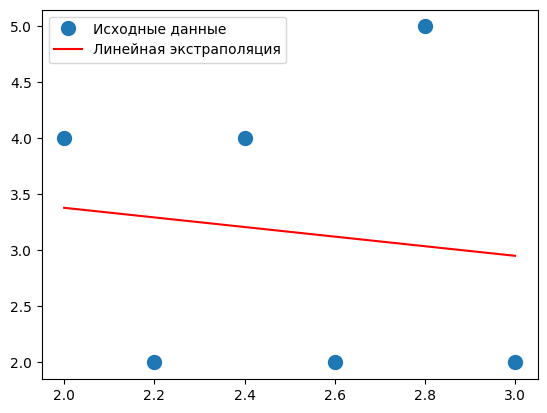

[-0.44642857  1.80357143  1.5       ]


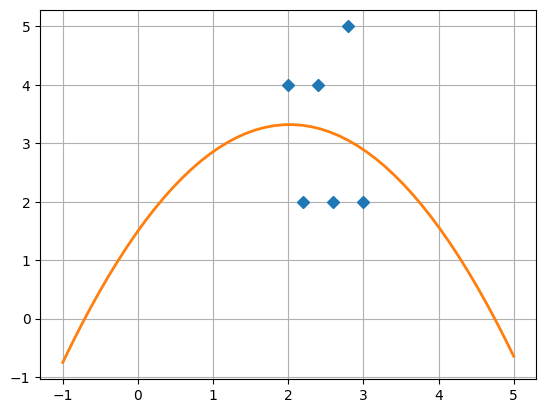

In [59]:
# Задание 4
# Вариант 9
x = np.array([2, 2.2, 2.4, 2.6, 2.8, 3])
y = np.array([4, 2, 4, 2, 5, 2])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(-1, 5, 50)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
print(s)